In [1]:
import datetime

import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf

In [2]:
covid_data = pd.read_csv('data/covid/covid_daily_roll.csv')
covid_data['date'] = covid_data['date'].apply(lambda d: pd.to_datetime(d))
policy_data = pd.read_csv("data/policies/eng-scot.csv", parse_dates=True)
policy_data['Date'] = policy_data['Date'].apply(lambda d: pd.to_datetime(d, format='%Y%m%d'))

In [3]:
def itr(intervention_name, policy_feature, level_post, startdate_str, offset):
    startdate = pd.to_datetime(startdate_str)
    y = covid_data.loc[covid_data['date'] > startdate, :]
    X = policy_data.loc[policy_data['RegionName'] == 'England', :]
    X.loc[X[policy_feature] == level_post, intervention_name] = 1
    X[intervention_name].fillna(0, inplace=True)
    X = X[X['Date'] > startdate]
    intdate = X[X[intervention_name] == 1]['Date'].sort_values().iloc[0]
    intdate_offset = intdate + datetime.timedelta(days=offset)
    X = X[X['Date'] < startdate + 2 * (intdate_offset-startdate)]
    y = y[y['date'] < startdate + 2 * (intdate_offset-startdate)]
    X['T'] = (X['Date'] - intdate).dt.days - offset # T is centered on the intervention date (it is 0 on the intervention date, negative before, positive after)
    data_reg2 = pd.merge(y, X, left_on='date', right_on='Date')
    reg2 = smf.glm(formula=f'slope_cases_roll_avg ~ T*{intervention_name}', data=data_reg2)
    res_reg2 = reg2.fit()
    print(f'Intervention date: {intdate}')
    print(f'Offset intervention date: {intdate_offset}')
    print(res_reg2.summary())

    fig, ax1 = plt.subplots(figsize=(10,5))
    ax2 = ax1.twinx()
    ax1.plot(y.set_index('date')['slope_cases_roll_avg'])
    ax2.plot(y.set_index('date')['cases_roll_avg'], color='red')
    plt.axvline(x=intdate, color='green')
    plt.axvline(x=intdate_offset, linestyle='--', color='green')
    plt.plot(figsize=(15, 5))

## Regression 1: Impact of lifting masking mandate during Omicron decline

/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_37927/1075062829.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X[policy_feature] == level_post, intervention_name] = 1
/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_37927/1075062829.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[intervention_name].fillna(0, inplace=True)


Intervention date: 2022-01-27 00:00:00
Offset intervention date: 2022-02-10 00:00:00
                  Generalized Linear Model Regression Results                   
Dep. Variable:     slope_cases_roll_avg   No. Observations:                   61
Model:                              GLM   Df Residuals:                       57
Model Family:                  Gaussian   Df Model:                            3
Link Function:                 identity   Scale:                          14203.
Method:                            IRLS   Log-Likelihood:                -376.10
Date:                  Sat, 09 Apr 2022   Deviance:                   8.0955e+05
Time:                          23:49:35   Pearson chi2:                 8.10e+05
No. Iterations:                       3   Pseudo R-squ. (CS):             0.9681
Covariance Type:              nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------

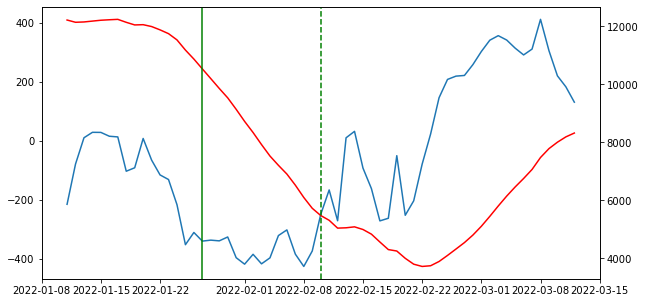

In [4]:
itr('nomask', 'H6_Facial Coverings', 0, '2022-01-10', 14)

## Regression 2: Impact of opening schools after Omicron decline

/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_37927/1075062829.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X[policy_feature] == level_post, intervention_name] = 1
/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_37927/1075062829.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[intervention_name].fillna(0, inplace=True)


Intervention date: 2022-02-24 00:00:00
Offset intervention date: 2022-03-03 00:00:00
                  Generalized Linear Model Regression Results                   
Dep. Variable:     slope_cases_roll_avg   No. Observations:                   57
Model:                              GLM   Df Residuals:                       53
Model Family:                  Gaussian   Df Model:                            3
Link Function:                 identity   Scale:                          24080.
Method:                            IRLS   Log-Likelihood:                -366.35
Date:                  Sat, 09 Apr 2022   Deviance:                   1.2762e+06
Time:                          23:49:35   Pearson chi2:                 1.28e+06
No. Iterations:                       3   Pseudo R-squ. (CS):             0.8559
Covariance Type:              nonrobust                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------

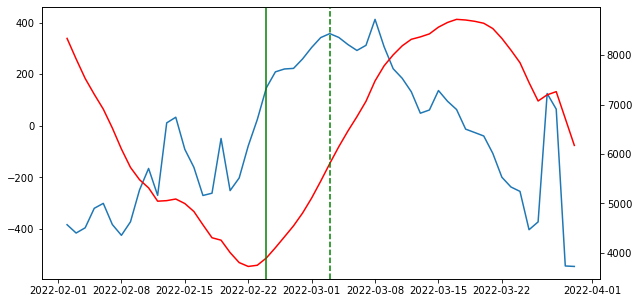

In [5]:
itr('schoolopen', 'C1_School closing', 0, '2022-02-01', 7)

## Regression 3: Easing mask mandate during Delta

/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_37927/1075062829.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X[policy_feature] == level_post, intervention_name] = 1
/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_37927/1075062829.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[intervention_name].fillna(0, inplace=True)


Intervention date: 2021-07-19 00:00:00
Offset intervention date: 2021-08-02 00:00:00
                  Generalized Linear Model Regression Results                   
Dep. Variable:     slope_cases_roll_avg   No. Observations:                   69
Model:                              GLM   Df Residuals:                       65
Model Family:                  Gaussian   Df Model:                            3
Link Function:                 identity   Scale:                          20922.
Method:                            IRLS   Log-Likelihood:                -439.07
Date:                  Sat, 09 Apr 2022   Deviance:                   1.3599e+06
Time:                          23:49:36   Pearson chi2:                 1.36e+06
No. Iterations:                       3   Pseudo R-squ. (CS):             0.3326
Covariance Type:              nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------

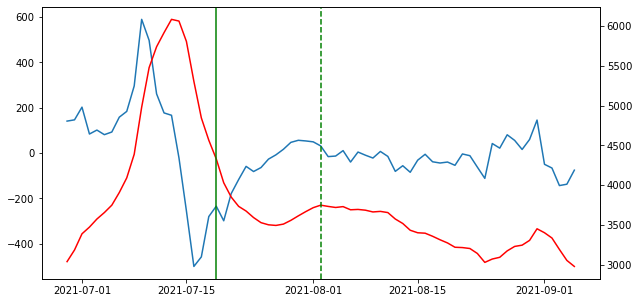

In [6]:
itr('maskingdelta', 'H6_Facial Coverings', 2, '2021-06-28', 14)

## Regression 4: Allowing public events during Delta

/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_37927/1075062829.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.loc[X[policy_feature] == level_post, intervention_name] = 1
/var/folders/hy/vpm71bsj40g8d9qhfg95kmtc0000gn/T/ipykernel_37927/1075062829.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[intervention_name].fillna(0, inplace=True)


Intervention date: 2021-05-17 00:00:00
Offset intervention date: 2021-06-07 00:00:00
                  Generalized Linear Model Regression Results                   
Dep. Variable:     slope_cases_roll_avg   No. Observations:                  107
Model:                              GLM   Df Residuals:                      103
Model Family:                  Gaussian   Df Model:                            3
Link Function:                 identity   Scale:                          16596.
Method:                            IRLS   Log-Likelihood:                -669.64
Date:                  Sat, 09 Apr 2022   Deviance:                   1.7094e+06
Time:                          23:49:36   Pearson chi2:                 1.71e+06
No. Iterations:                       3   Pseudo R-squ. (CS):             0.1386
Covariance Type:              nonrobust                                         
                          coef    std err          z      P>|z|      [0.025      0.975]
-----------------

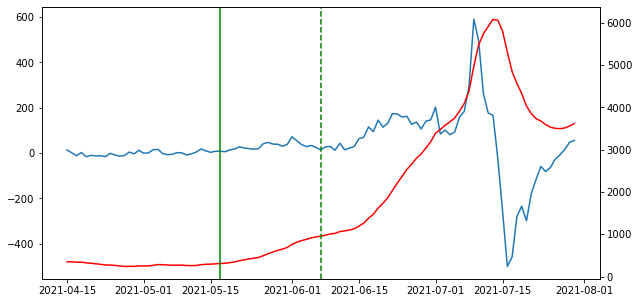

In [7]:
itr('eventscancelrecom', 'C3_Cancel public events', 1, '2021-04-14', 21)

## (Trial regression 5: Multiple policies)

In [8]:
reg5_startdate = pd.to_datetime('2022-01-17')
reg5_enddate = pd.to_datetime('2022-03-21')

data_reg5_X = policy_data[policy_data['RegionName'] == 'England']
data_reg5_X = data_reg5_X[data_reg5_X['Date'] > reg5_startdate]

data_reg5_X.loc[data_reg5_X['H6_Flag'].isna(), 'nomask'] = 1
data_reg5_X['nomask'] = data_reg5_X['nomask'].fillna(0)
reg5_offset1 = 10
reg5_intdate1 = data_reg5_X[data_reg5_X['nomask'] == 1]['Date'].sort_values().iloc[0]
reg5_intdate1_offset = reg5_intdate1 + datetime.timedelta(days=reg5_offset1)
data_reg5_X['T1'] = (data_reg5_X['Date'] - reg5_intdate1).dt.days - reg5_offset1
print(reg5_intdate1)

data_reg5_X.loc[data_reg5_X['C1_Flag'].isna(), 'schoolopen'] = 1
data_reg5_X['schoolopen'] = data_reg5_X['schoolopen'].fillna(0)
reg5_offset2 = 6
reg5_intdate2 = data_reg5_X[data_reg5_X['schoolopen'] == 1]['Date'].sort_values().iloc[0]
reg5_intdate2_offset = reg5_intdate2 + datetime.timedelta(days=reg5_offset2)
data_reg5_X['T2'] = (data_reg5_X['Date'] - reg5_intdate2).dt.days - reg5_offset2

data_reg5_X = data_reg5_X[data_reg5_X['Date'] < reg5_enddate]
data_reg5_y = covid_data[covid_data['date'] > reg5_startdate]
data_reg5_y = data_reg5_y[data_reg5_y['date'] < reg5_enddate]

data_reg5 = pd.merge(data_reg5_y, data_reg5_X, left_on='date', right_on='Date')
reg5 = smf.glm(formula='slope_cases_roll_avg ~ T1*nomask + T2*schoolopen', data=data_reg5)
res_reg5 = reg5.fit()
print(res_reg5.summary())

2022-01-27 00:00:00
                  Generalized Linear Model Regression Results                   
Dep. Variable:     slope_cases_roll_avg   No. Observations:                   62
Model:                              GLM   Df Residuals:                       56
Model Family:                  Gaussian   Df Model:                            5
Link Function:                 identity   Scale:                          9368.2
Method:                            IRLS   Log-Likelihood:                -368.32
Date:                  Sat, 09 Apr 2022   Deviance:                   5.2462e+05
Time:                          23:49:37   Pearson chi2:                 5.25e+05
No. Iterations:                       3   Pseudo R-squ. (CS):             0.9967
Covariance Type:              nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Interc

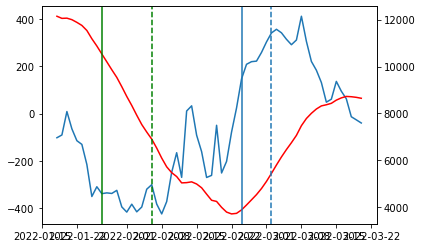

In [9]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(data_reg5_y.set_index('date')['slope_cases_roll_avg'])
ax2.plot(data_reg5_y.set_index('date')['cases_roll_avg'], color='red')
plt.axvline(x=reg5_intdate1, color='green')
plt.axvline(x=reg5_intdate1_offset, color='green', linestyle='--')
plt.axvline(x=reg5_intdate2)
plt.axvline(x=reg5_intdate2_offset, linestyle='--')